Accuracy (Decision Tree): 0.38819454901370276


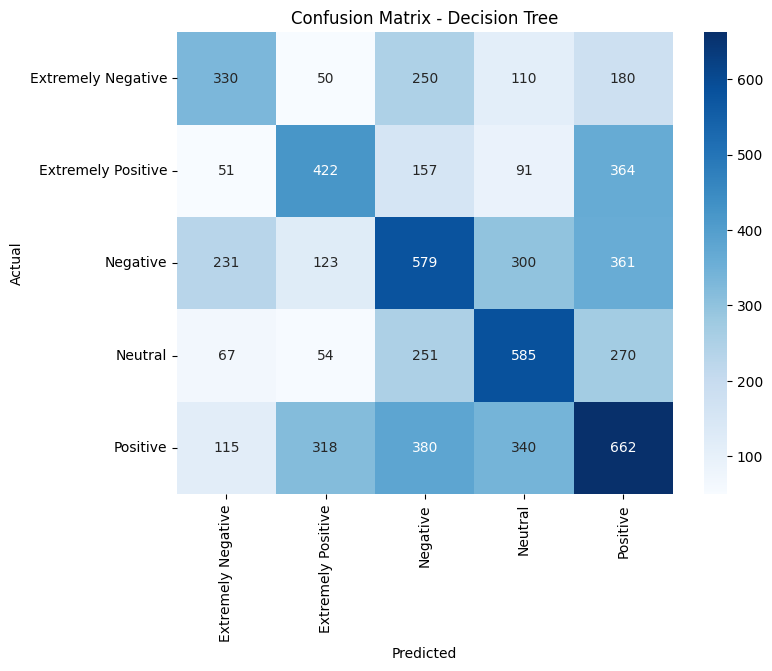

Predicted sentiments (Decision Tree): ['Negative' 'Positive' 'Extremely Positive' ... 'Extremely Positive'
 'Extremely Positive' 'Extremely Positive']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training and test datasets
train_data = pd.read_csv('/content/Corona_NLP_train.csv', encoding='latin1')
test_data = pd.read_csv('/content/Corona_NLP_test.csv', encoding='latin1')

# Drop unnecessary columns
train_data = train_data[['OriginalTweet', 'Sentiment']]
test_data = test_data[['OriginalTweet', 'Sentiment']]

# Handle missing values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Data cleaning
def clean_text(text):
    # Apply data cleaning operations
    return text

train_data['OriginalTweet'] = train_data['OriginalTweet'].apply(clean_text)
test_data['OriginalTweet'] = test_data['OriginalTweet'].apply(clean_text)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['OriginalTweet'], train_data['Sentiment'], test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert text to vectors
X_train_vectors = vectorizer.fit_transform(X_train)
X_val_vectors = vectorizer.transform(X_val)
X_test_vectors = vectorizer.transform(test_data['OriginalTweet'])

# Handle missing values in the test dataset (if any)
imputer = SimpleImputer(strategy='most_frequent')
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Implement Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_vectors, y_train)

# Predict using Decision Tree
y_pred_dt = dt.predict(X_val_vectors)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print("Accuracy (Decision Tree):", accuracy_dt)

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_val, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Predict using the test dataset
y_pred_test_dt = dt.predict(X_test_vectors)

# Print the predicted sentiments for the test dataset
print("Predicted sentiments (Decision Tree):", y_pred_test_dt)
